In [ ]:
import time
import psutil
import matplotlib.pyplot as plt

# Initialize lists to store timestamp and memory values
timestamps = []
memory_values = []

# Create the plot
plt.xlabel('Time')
plt.ylabel('Free Memory (MB)')
plt.title('Free Memory Monitoring')

# Continuous plot update
i = 0
while True:
    # Get current timestamp and free memory
    timestamp = time.strftime('%H:%M:%S')
    memory = psutil.virtual_memory().available / (1024 * 1024)  # in MB

    # Add values to lists
    timestamps.append(timestamp)
    memory_values.append(memory)

    # Update the plot
    plt.plot(timestamps, memory_values, color='blue')
    plt.draw()
    plt.pause(2)  # Pause for 2 seconds
    print(i)
    i += 1
    if i==2: break

# Keep the plot window open
plt.show()

In [ ]:
import psutil
import GPUtil
import matplotlib.pyplot as plt
import time

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('Utilization')
ax.set_title('System Utilization')
# Add legends, customize plot settings, etc.

# Start the loop
while True:
    # Get system information
    cpu_utilization = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().percent
    gpu = GPUtil.getGPUs()[0]
    gpu_memory_usage = gpu.memoryUsed
    gpu_utilization = gpu.load

    # Update the plot
    ax.plot(x_data, y_data)  # Add appropriate data points

    # Refresh the plot
    plt.pause(1)  # Pause for 1 second before the next update


In [ ]:
import psutil
import matplotlib.pyplot as plt
import time

# Initialize the data arrays
x_data = []  # Time points
y_cpu = []   # CPU utilization
y_mem = []   # Memory usage

# Set the total duration for monitoring (in seconds)
total_duration = 60

# Start time
start_time = time.time()

# Monitor system resources for the specified duration
while time.time() - start_time < total_duration:
    # Get the current timestamp
    timestamp = time.time() - start_time

    # Collect CPU utilization (%)
    cpu_percent = psutil.cpu_percent(interval=1)

    # Collect memory usage (%)
    mem_usage = psutil.virtual_memory().percent

    # Append data points to the arrays
    x_data.append(timestamp)
    y_cpu.append(cpu_percent)
    y_mem.append(mem_usage)

    # Plot the data
    plt.plot(x_data, y_cpu, label='CPU Utilization')
    plt.plot(x_data, y_mem, label='Memory Usage')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Utilization (%)')
    plt.title('System Resource Monitoring')
    plt.legend()
    plt.grid(True)
    plt.pause(0.1)  # Pause to update the plot

# Keep the plot window open
plt.show()


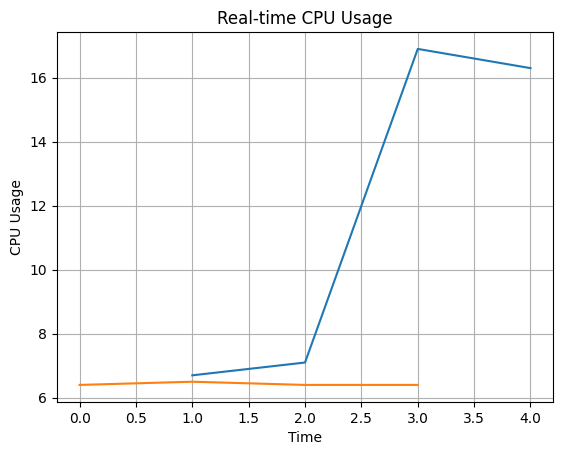

KeyboardInterrupt: 

In [34]:
import psutil
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Initialize empty lists for data
x_data = []
y_data = []
z_data = []

# Set up the plot
plt.figure()

while True:
    # Get system resource data
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().percent

    # Append data to lists
    x_data.append(len(x_data) + 1)
    y_data.append(cpu_usage)
    z_data.append(memory_usage)

    # Clear the previous plot
    clear_output(wait=True)

    # Plot the updated data
    plt.plot(x_data, y_data, z_data)
    plt.xlabel('Time')
    plt.ylabel('CPU Usage')
    plt.title('Real-time CPU Usage')
    plt.grid(True)
    plt.show()

    # Pause for a moment before updating again
    time.sleep(1)


/tmp/ipykernel_110642/4240879703.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_cpuutil.set_yticklabels(['{:03.0f}'.format(x) for x in ax_cpuutil.get_yticks()])
/tmp/ipykernel_110642/4240879703.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_gpuutil.set_yticklabels(['{:03.0f}'.format(x) for x in ax_gpuutil.get_yticks()])


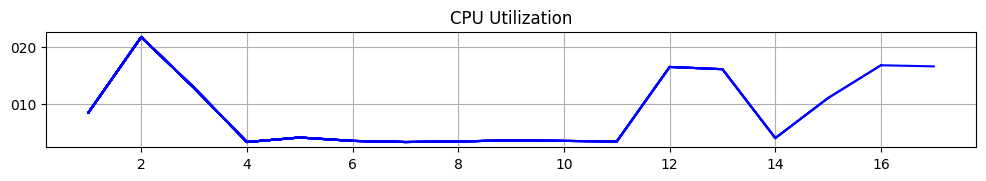

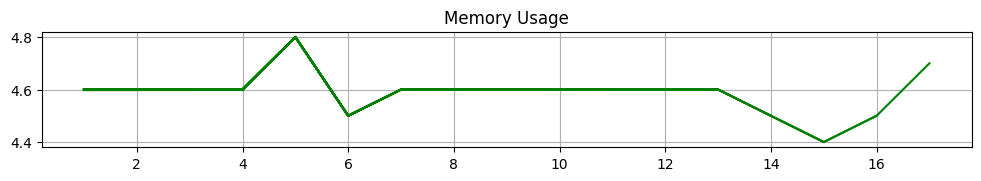

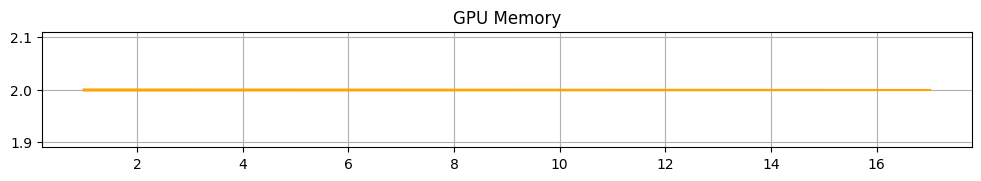

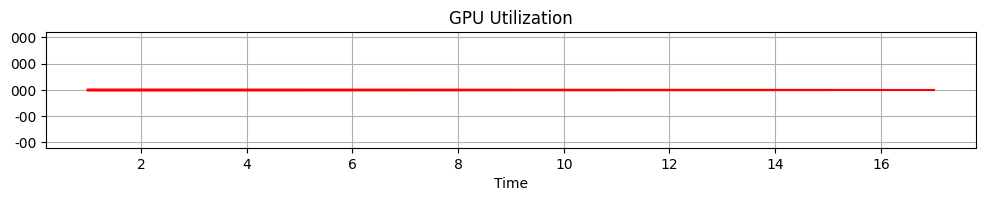

KeyboardInterrupt: 

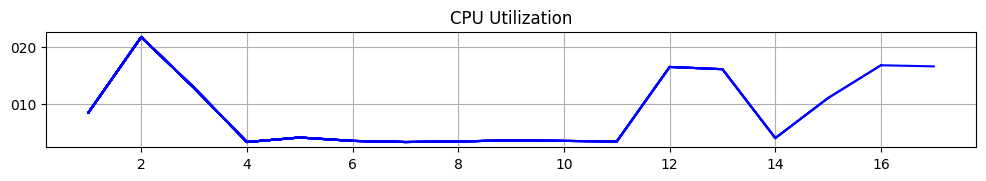

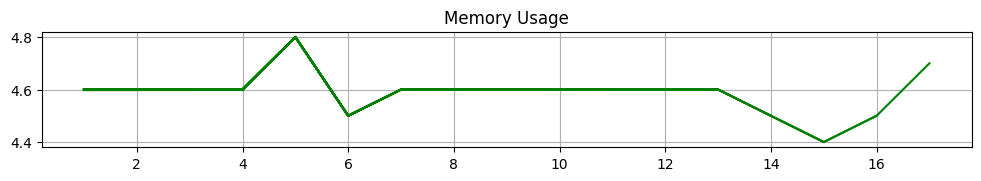

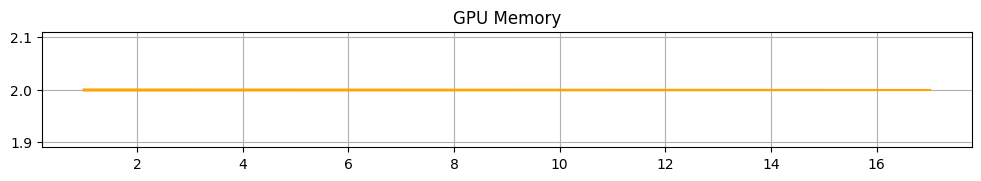

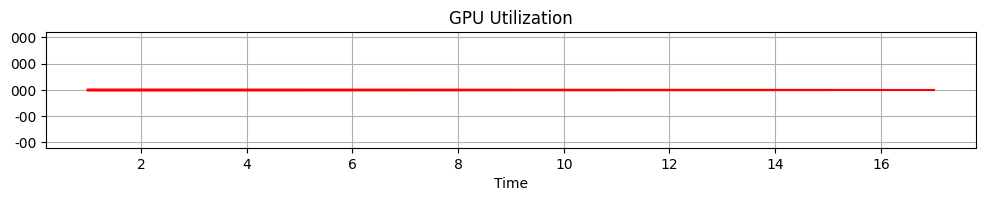

In [74]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import psutil
import GPUtil

# Initialize lists to store data
timestamps, cpu_data, memory_data, gpu_memory_data, gpu_utilization_data = [], [], [], [], []

interval = 1 # Set the interval in seconds for data collection
duration = 60 # Set the duration in seconds for data collection
iterations = int(duration / interval) # Calculate the number of iterations

# Create the figures and axes for plotting
fig_cpuutil, ax_cpuutil = plt.subplots(figsize=(12, 1.5)); plt.grid(True, which='both')
fig_memoryu, ax_memoryu = plt.subplots(figsize=(12, 1.5)); plt.grid(True, which='both')
fig_gpumemo, ax_gpumemo = plt.subplots(figsize=(12, 1.5)); plt.grid(True, which='both')
fig_gpuutil, ax_gpuutil = plt.subplots(figsize=(12, 1.5)); plt.grid(True, which='both')

# Set initial colors for each plot
cpu_color, memory_color, gpu_memory_color, gpu_utilization_color = 'blue', 'green', 'orange', 'red'

# Start the data collection loop
for i in range(iterations):
    # Get the current timestamp
    timestamp = i + 1

    # Get the CPU utilization
    cpu_percent = psutil.cpu_percent(interval=None)
    
    # Get the memory usage
    memory_usage = psutil.virtual_memory().percent
    
    # Get the GPU information
    gpus = GPUtil.getGPUs()
    gpu_memory = [gpu.memoryUsed for gpu in gpus][1]
    gpu_utilization = [gpu.load for gpu in gpus][1] *100

    # Add the data to the lists
    timestamps.append(timestamp)
    cpu_data.append(cpu_percent)
    memory_data.append(memory_usage)
    gpu_memory_data.append(gpu_memory)
    gpu_utilization_data.append(gpu_utilization)
    
    # timestamps = timestamps[-60:]

    # Limit the x-axis range to show only the last 60 seconds of data
    start_index = max(0, i - 59)
    end_index = i + 1

    # Clear the previous plots
    clear_output(wait=True)

    # Plot the CPU utilization
    ax_cpuutil.plot(timestamps[start_index:end_index], cpu_data[start_index:end_index], label='CPU', color=cpu_color)
    ax_cpuutil.set_title('CPU Utilization')
    # ax_cpuutil.set_yticklabels(['{:03.0f}'.format(x) for x in ax_cpuutil.get_yticks()])
    ax_cpuutil.yaxis.set_major_locator(plt.FixedLocator(ax_cpuutil.get_yticks()))

    # Plot the memory usage
    ax_memoryu.plot(timestamps[start_index:end_index], memory_data[start_index:end_index], label='Memory', color=memory_color)
    ax_memoryu.set_title('Memory Usage')
    # ax_memoryu.set_yticklabels(['{:03.0f}'.format(x) for x in ax_memoryu.get_yticks()])
    ax_memoryu.yaxis.set_major_locator(plt.FixedLocator(ax_memoryu.get_yticks()))
    
    # Plot the GPU memory
    ax_gpumemo.plot(timestamps[start_index:end_index], gpu_memory_data[start_index:end_index], label='GPU Memory', color=gpu_memory_color)
    ax_gpumemo.set_title('GPU Memory')
    # ax_gpumemo.set_yticklabels(['{:03.0f}'.format(x) for x in ax_gpumemo.get_yticks()])
    ax_gpumemo.yaxis.set_major_locator(plt.FixedLocator(ax_gpumemo.get_yticks()))

    # Plot the GPU utilization
    ax_gpuutil.plot(timestamps[start_index:end_index], gpu_utilization_data[start_index:end_index], label='GPU Utilization', color=gpu_utilization_color)
    ax_gpuutil.set_xlabel('Time')
    ax_gpuutil.set_title('GPU Utilization')
    # ax_gpuutil.set_yticklabels(['{:03.0f}'.format(x) for x in ax_gpuutil.get_yticks()]) 
    ax_gpuutil.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax_gpuutil.set_yticklabels(['{:03.0f}'.format(x) for x in ax_gpuutil.get_yticks()])

    # Show the plots
    display(fig_cpuutil); display(fig_memoryu); display(fig_gpumemo); display(fig_gpuutil)
    
    # Wait for the specified interval
    time.sleep(interval)

# Close the plots
plt.close(fig_cpuutil); plt.close(fig_memoryu); plt.close(fig_gpumemo); plt.close(fig_gpuutil)


In [62]:
# ax_memoryu ax_gpumemo ax_gpuutil
# ['{:03.0f}'.format(x) for x in ax_gpuutil.get_yticks()]
# [gpu.load for gpu in gpus][1]

['-00', '-00', '000', '000', '000']